### Read the results data

In [1]:
path_to_csv = "results_faultlocalization/java8/results.csv"

In [2]:
import pandas as pd

data = pd.read_csv(path_to_csv, index_col=["pid", "bid"])
data

target   env  checkout  compile  check_classfiles  \
pid     bid                                                      
Time    23      1.8  True      True    False             False   
        26      1.8  True      True    False             False   
        3       1.8  True      True     True              True   
        12      1.8  True      True    False             False   
        20      1.8  True      True    False             False   
...             ...   ...       ...      ...               ...   
Mockito 1       1.8  True      True    False             False   
        17      1.8  True      True    False             False   
        4       1.8  True      True    False             False   
        32      1.8  True      True    False             False   
        30      1.8  True      True    False             False   

             gzoltar_exec_time  gzoltar_executed_tests  gzoltar_failing_tests  \
pid     bid                                                                     
Time    23                 NaN                   False                  False   
        26                 NaN                   False                  False   
        3                10.85                   False                  False   
        12                 NaN                   False                  False   
        20                 NaN                   False                  False   
...                        ...                     ...                    ...   
Mockito 1                  NaN                   False                  False   
        17                 NaN                   False                  False   
        4                  NaN                   False                  False   
        32                 NaN                   False                  False   
        30                 NaN                   False                  False   

             gzoltar_fl  flacoco_exec_time  flacoco_executed_tests  \
pid     bid                                                          
Time    23        False                NaN                   False   
        26        False                NaN                   False   
        3         False            175.644                   False   
        12        False                NaN                   False   
        20        False                NaN                   False   
...                 ...                ...                     ...   
Mockito 1         False                NaN                   False   
        17        False                NaN                   False   
        4         False                NaN                   False   
        32        False                NaN                   False   
        30        False                NaN                   False   

             flacoco_failing_tests  flacoco_fl  
pid     bid                                     
Time    23                   False       False  
        26                   False       False  
        3                    False        True  
        12                   False       False  
        20                   False       False  
...                            ...         ...  
Mockito 1                    False       False  
        17                   False       False  
        4                    False       False  
        32                   False       False  
        30                   False       False  

[835 rows x 13 columns]

### Base setup
Defects4J v2.0 has 835 bugs

In [3]:
print("The results file contains %d bugs." % len(data))
print("The env was correctly setup for %d bugs." % len(data[data["env"]==True]))
env_data = data[data["env"]==True]
print("Out of those, the checkout was performed correctly for %d bugs." % len(env_data[env_data["checkout"]==True]))
checkout_data = env_data[env_data["checkout"]==True]

The results file contains 835 bugs.
The env was correctly setup for 835 bugs.
Out of those, the checkout was performed correctly for 835 bugs.


### Compilation and class files

In [4]:
print("%d bugs were compiled correctly." % len(checkout_data[checkout_data["compile"]==True]))
compile_data = checkout_data[checkout_data["compile"]==True]
print("Of those, %d bugs had the correct classfile versions in the target directories." % len(compile_data[compile_data["check_classfiles"]==True]))
classfile_data = compile_data[compile_data["check_classfiles"]==True]

# Save compilable bugs in csv file
pd.DataFrame(index=classfile_data.index).to_csv("results_faultlocalization/java8_bugs.csv")

407 bugs were compiled correctly.
Of those, 371 bugs had the correct classfile versions in the target directories.


### Test execution

We only consider the bugs which where correctly setup

In [5]:
gzoltar_executed = len(classfile_data[classfile_data["gzoltar_executed_tests"]==True])
gzoltar_failing = len(classfile_data[classfile_data["gzoltar_failing_tests"]==True])
gzoltar_fl = len(classfile_data[classfile_data["gzoltar_fl"]==True])
gzoltar = (gzoltar_executed, gzoltar_failing, gzoltar_fl)

flacoco_executed = len(classfile_data[classfile_data["flacoco_executed_tests"]==True])
flacoco_failing = len(classfile_data[classfile_data["flacoco_failing_tests"]==True])
flacoco_fl = len(classfile_data[classfile_data["flacoco_fl"]==True])
flacoco = (flacoco_executed, flacoco_failing, flacoco_fl)

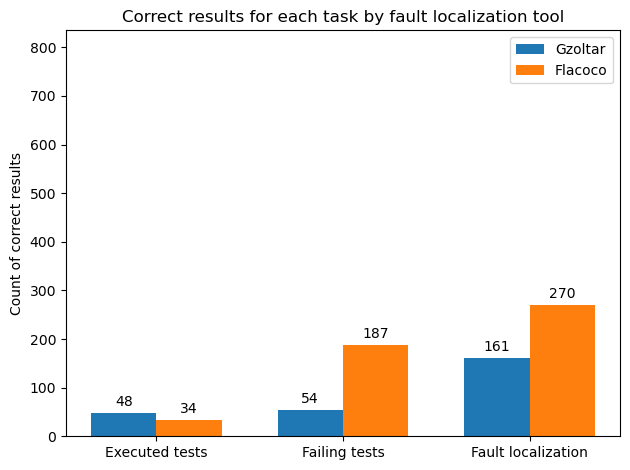

In [6]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(len(gzoltar))
width=0.35

fig, ax = plt.subplots()
ax.set_ylim([0, len(checkout_data)])
gzoltar_bar = ax.bar(ind - width/2, gzoltar, width, label="Gzoltar")
flacoco_bar = ax.bar(ind + width/2, flacoco, width, label="Flacoco")

ax.set_ylabel("Count of correct results")
ax.set_title("Correct results for each task by fault localization tool")
ax.set_xticks(ind)
ax.set_xticklabels(("Executed tests", "Failing tests", "Fault localization"))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
        
autolabel(gzoltar_bar, "center")
autolabel(flacoco_bar, "center")

fig.tight_layout()
plt.show()

### Analyse the failures

In [7]:
compile_heatmap_df = pd.DataFrame(checkout_data.loc[:,"compile"].sort_index().astype(int)).unstack()
classfiles_heatmap_df = pd.DataFrame(compile_data.loc[:,"check_classfiles"].sort_index().astype(int)).unstack()
gzoltar_heatmap_df = pd.DataFrame(classfile_data.loc[:,"gzoltar_fl"].sort_index().astype(int)).unstack()
flacoco_heatmap_df = pd.DataFrame(classfile_data.loc[:,"flacoco_fl"].sort_index().astype(int)).unstack()

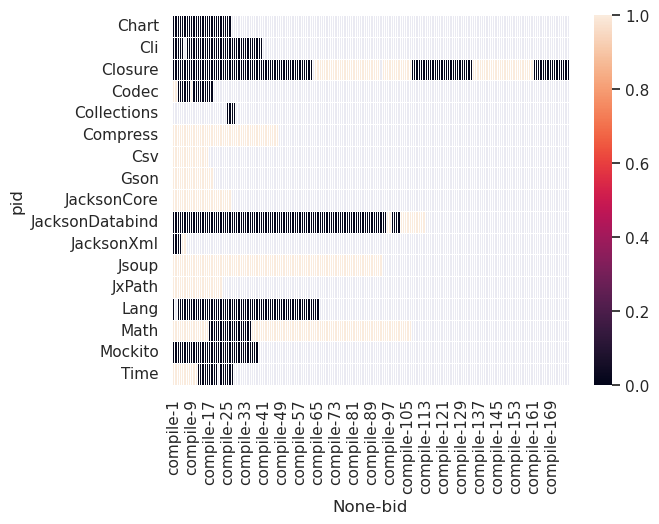

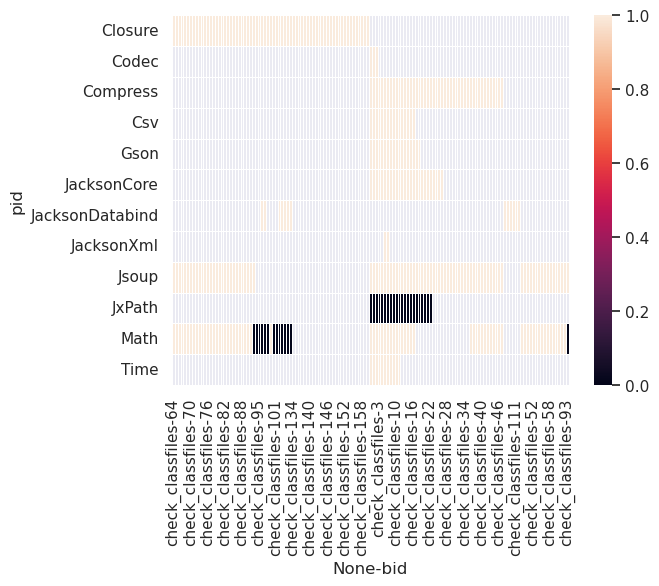

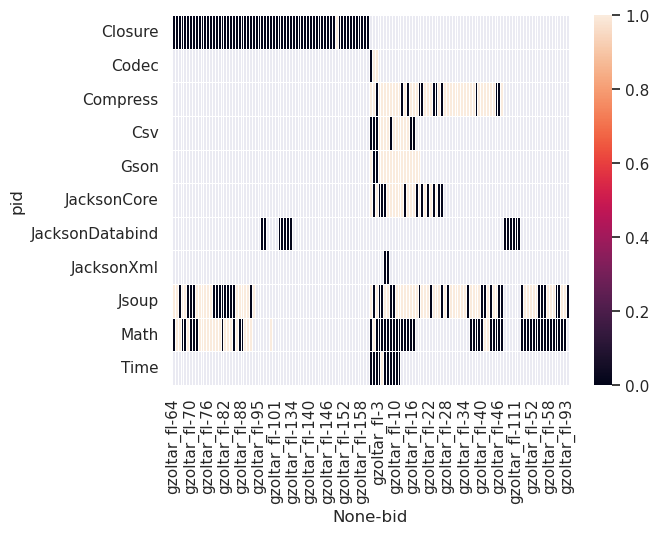

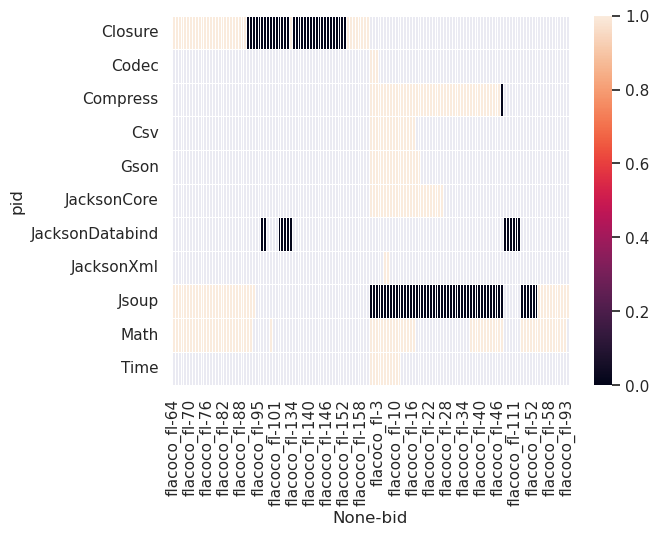

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.heatmap(compile_heatmap_df, linewidths=.5)
plt.show()

sns.heatmap(classfiles_heatmap_df, linewidths=.5)
plt.show()

sns.heatmap(gzoltar_heatmap_df, linewidths=.5)
plt.show()

sns.heatmap(flacoco_heatmap_df, linewidths=.5)
plt.show()